# COVID-19 Analysis

Author: Nicholas Czipo

Date: 8/9/2025

## I. Project Overview

The purpose of this project is to analyze COVID-19 data in conjunction with the Human Development Index(HDI) in order to better understand which countries proved more resilient in the face of a pandemic. The HDI takes into consideration GNI per capita, life expectancy and average years of schooling to form a score for each country. Investigating whether or not countries with higher HDI scores fared better during the pandemic can help inform decision making on how to better prepare for future pandemics.

The data used in this project was gathered from ourworldindata.org and worldometers.info.

Some of the questions this project seeks to answer are:

*1.) What is the mean/median confirmed case count? What does the distribution of confirmed cases look like?*

*2.)What is the mean/median confirmed death count? What does the distribution of confirmed deaths look like?*

*3.)How did COVID-19 impact different regions of the world?*

*4.)Is there a correlation between HDI scores and case/death counts*


## II. Importing the Data 

Let's begin by importing any necessary modules and datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
from bs4 import BeautifulSoup as bs

The COVID-19 data will be scraped from worldometers.info at https://www.worldometers.info/coronavirus/.

In [2]:
#Get HTML from webpage
response = requests.get('https://www.worldometers.info/coronavirus/')
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")


In [3]:
countries_list = []   # Multidimensional array that holds table rows; will be converted to a dataframe 
                      # after parsing is complete     
headers = []          # Holds header names

# EXTRACT TABLE HEADERS 
data_table = soup.find('table', id = 'main_table_countries_today') #finds table using table name

thead = data_table.find('thead')           #finds <thead> tag within table
 
header_row = thead.find('tr')              #finds row of table headers using <tr> tag
for th in header_row.find_all('th'):       #finds all header cell tags <th> and text therein
    headers.append(th.text.strip())        #appends headers list with each header name, stripping all whitespace

    countries_list.append(headers)      

#EXTRACT TABLE DATA
data_table = soup.find('table', id='main_table_countries_today').tbody      #finds table body

#The following nested for loop iterates through each row in data_table. For each row, every cell is appended 
#to the row_data list. When all cells are parsed, the complete row is appened to countries_list
for row in data_table.find_all('tr'):                 
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text)
    countries_list.append(row_data)

# CONVERT COUNTRIES_LIST TO A PANDAS DATAFRAME
covid= pd.DataFrame(countries_list)

# SAVE AS CSV FILE
covid.to_excel(f'covid19.xlsx', index = False)


The dataset pertaining to Human Development Index scores was obtained from ourworldindata.org and can be found in downloadable format here: https://ourworldindata.org/grapher/human-development-index?tab=table

I will simply read in the dataset.

In [67]:
hdi = pd.read_csv('HDI.csv')

## III. Cleaning the Data

Having imported the data, we can begin inspecting and wrangling it. The ultimate goal is to end up with one clean dataframe.

### Cleaning COVID-19 Data

Let's begin with inspecting the covid dataframe.

In [5]:
covid.shape

(261, 22)

In [6]:
covid.head(35)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
2,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
3,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
4,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
5,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
6,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
7,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
8,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
9,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


A few quick observations can be made. First, we have 20 duplicate rows containing the column names. Second, the column names are not actual column headers. Third, note that there are several rows pertaining to continent wide data as well as the world.

We will remove all but one duplicate column name row and then convert the remaining row into true column headers for the table. Then we will remove the rows pertaining to continent wide data. 

In [7]:
covid = covid[21:]
covid.reset_index(drop = True, inplace = True)
covid.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,\nNorth America\n,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,\n,,,,,
2,,\nAsia\n,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,\n,,,,,
3,,\nEurope\n,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,\n,,,,,
4,,\nSouth America\n,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,\n,,,,,
5,,\nOceania\n,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,\n,,,,,
6,,\nAfrica\n,"12,860,924",,"258,892",,"12,090,808",,"511,224",529,...,,,,Africa,\n,,,,,
7,,\n\n,721,,15,,706,,0,0,...,,,,,\n,,,,,
8,,World,"704,753,890",0,"7,010,681",0,"675,619,811",+790,"22,123,398","34,794",...,,,,All,\n,,,,,
9,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"


In [8]:
#Remove duplicate header rows and convert remaining row to actual column headers
covid.columns = covid.iloc[0]
covid = covid.drop([0])
covid.reset_index(drop = True, inplace = True)
covid.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,\n,,,,,
1,,\nAsia\n,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,\n,,,,,
4,,\nOceania\n,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,\n,,,,,
5,,\nAfrica\n,"12,860,924",,"258,892",,"12,090,808",,"511,224",529,...,,,,Africa,\n,,,,,
6,,\n\n,721,,15,,706,,0,0,...,,,,,\n,,,,,
7,,World,"704,753,890",0,"7,010,681",0,"675,619,811",+790,"22,123,398","34,794",...,,,,All,\n,,,,,
8,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
9,2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4


In [9]:
#Remove continent and worldwide data rows 
covid = covid.drop([0,1,2,3,4,5,6,7])
covid.reset_index(drop = True, inplace = True)
covid.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
1,2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4
2,3,France,"40,138,560",,"167,642",,"39,970,918",,0,,...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0,,,
3,4,Germany,"38,828,995",,"183,027",,"38,240,600",,"405,368",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1,,,"4,833"
4,5,Brazil,"38,743,918",,"711,380",,"36,249,161",,"1,783,377",N/A,...,"63,776,166","296,146","215,353,593",South America,6,303,3,,,"8,281"


Next, I will drop any columns that will not be used. 

In [10]:
covid.columns

Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object', name=0)

In [11]:
to_drop = ['#', 'NewCases', 'NewDeaths', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
           'Deaths/1M pop', 'TotalRecovered', 'TotalTests', 'Tests/\n1M pop', 'Population', '1 Caseevery X ppl', 
           '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']
covid.drop(to_drop, axis = 1, inplace = True)
covid.columns

Index(['Country,Other', 'TotalCases', 'TotalDeaths', 'Tot Cases/1M pop',
       'Continent'],
      dtype='object', name=0)

In [12]:
#Drop the Tot Cases/1M pop column by column index (for some reason, dropping by column name was not working)
covid.drop(covid.columns[3], axis = 1, inplace = True)
covid.columns

Index(['Country,Other', 'TotalCases', 'TotalDeaths', 'Continent'], dtype='object', name=0)

Let's also rename the first column and reassign the Continent column so that it is the second column in the dataset .

In [13]:
covid.rename(columns = {covid.columns[0]: 'Country'}, inplace = True)
new_columns = ['Country', 'Continent', 'TotalCases', 'TotalDeaths']
covid = covid.reindex(columns = new_columns)
covid.columns

Index(['Country', 'Continent', 'TotalCases', 'TotalDeaths'], dtype='object', name=0)

Having cleaned up the dataset, let's take a closer look at the datatype of each column.

In [14]:
covid.dtypes

0
Country        object
Continent      object
TotalCases     object
TotalDeaths    object
dtype: object

As we can see, all the columns are of the object datatype whereas they should be numeric, exluding the Country and Continent columns. Let's rectify this.

In [15]:
covid['Country'] = covid['Country'].astype(str).str.replace(',', '')
covid['TotalCases'] = covid['TotalCases'].astype(str).str.replace(',', '')
covid['TotalDeaths'] = covid['TotalDeaths'].astype(str).str.replace(',', '')


columns_to_numeric = ['TotalCases', 'TotalDeaths']
covid[columns_to_numeric] = covid[columns_to_numeric].apply(pd.to_numeric, errors = 'coerce', axis = 1)
covid.dtypes

0
Country         object
Continent       object
TotalCases     float64
TotalDeaths    float64
dtype: object

Finally, let's check how many null values our dataset contains.

In [16]:
covid.isnull().sum()

0
Country        0
Continent      0
TotalCases     0
TotalDeaths    5
dtype: int64

We can average the total deaths column and use that value to fill in any missing values.

In [17]:
avg = covid['TotalDeaths'].mean()
covid['TotalDeaths'] = covid['TotalDeaths'].fillna(avg)
covid.isnull().sum()


0
Country        0
Continent      0
TotalCases     0
TotalDeaths    0
dtype: int64

Having cleaned our data, let's save it to a new excel file. 

In [18]:
covid.to_excel('Covid Cleaned.xlsx', index = False)

### Cleaning HDI Index Dataset

Let's familiarize ourselves with the dataset first.

In [19]:
hdi.shape

(9996, 6)

In [20]:
hdi.head(35)

,Entity,Code,Year,Human Development Index,World regions according to OWID,time
0,Afghanistan,AFG,1990.0,0.285,Asia,2023
1,Afghanistan,AFG,1991.0,0.291,Asia,2023
2,Afghanistan,AFG,1992.0,0.301,Asia,2023
3,Afghanistan,AFG,1993.0,0.311,Asia,2023
4,Afghanistan,AFG,1994.0,0.305,Asia,2023
5,Afghanistan,AFG,1995.0,0.329,Asia,2023
6,Afghanistan,AFG,1996.0,0.334,Asia,2023
7,Afghanistan,AFG,1997.0,0.338,Asia,2023
8,Afghanistan,AFG,1998.0,0.338,Asia,2023
9,Afghanistan,AFG,1999.0,0.347,Asia,2023


As we can see, there are many HDI scores for each country spanning the years 1990-2023. Given that we are only interested in how countries fared during the pandemic years, we will retain the years 2019-2023 and drop the rest. Note that we will also be dropping the country code, world regions and time columns in the following code as well.

In [21]:
to_keep = [2018, 2019, 2020, 2021, 2022, 2023]
hdi = hdi[hdi['Year'].isin(to_keep)]
hdi.reset_index(drop = True, inplace = True)
hdi.head(35)

,Entity,Code,Year,Human Development Index,World regions according to OWID,time
0,Afghanistan,AFG,2018.0,0.498000,Asia,2023
1,Afghanistan,AFG,2019.0,0.507000,Asia,2023
2,Afghanistan,AFG,2020.0,0.501000,Asia,2023
3,Afghanistan,AFG,2021.0,0.486000,Asia,2023
4,Afghanistan,AFG,2022.0,0.495000,Asia,2023
5,Afghanistan,AFG,2023.0,0.496000,Asia,2023
6,Africa,NaN,2018.0,0.555833,NaN,2018
7,Africa,NaN,2019.0,0.560354,NaN,2019
8,Africa,NaN,2020.0,0.559465,NaN,2020
9,Africa,NaN,2021.0,0.561104,NaN,2021


For the purposes of this project, it will simplify matters if each year has its own dedicated column. That is, we want to reshape our data from long to wide form.

In [22]:
years = [2020, 2021, 2022, 2023]
hdi = hdi.pivot(index = 'Entity', columns = 'Year', values = 'Human Development Index')
hdi = hdi.rename_axis(columns=None).reset_index()               #I had to look up how to convert the country column back
                                                                #to a regular column after calling the pivot method. I found 
                                                                #a useful solution on stackoverflow, which can be found here:
                                                                #https://stackoverflow.com/questions/28337117/how-to-pivot-a-dataframe-in-pandas
hdi.head()

,Entity,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,Afghanistan,0.498000,0.507000,0.501000,0.486000,0.495000,0.496000
1,Africa,0.555833,0.560354,0.559465,0.561104,0.571485,0.576059
2,Aland Islands,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,0.801000,0.805000,0.794000,0.794000,0.806000,0.810000
4,Algeria,0.749000,0.753000,0.742000,0.755000,0.761000,0.763000


Let's go ahead and rename our columns.

In [23]:
rename = {'Entity': 'Country', 2018.0: 'hdi2018', 2019.0: 'hdi2019', 2020.0: 'hdi2020', 2021.0: 'hdi2021', 
          2022.0: 'hdi2022', 2023.0: 'hdi2023'}
hdi.rename(columns = rename, inplace = True)
hdi.columns

Index(['Country', 'hdi2018', 'hdi2019', 'hdi2020', 'hdi2021', 'hdi2022',
       'hdi2023'],
      dtype='object')

We can now check for any null values.

In [24]:
hdi.isnull().sum()

Country     0
hdi2018    80
hdi2019    80
hdi2020    80
hdi2021    80
hdi2022    80
hdi2023    79
dtype: int64

As we can see, we have quite a few null values. Let's take a closer look by saving all null rows into a seperate dataframe.

In [25]:
nulls = hdi[hdi.isnull().any(axis=1)]

In [26]:
nulls.shape

(81, 7)

In [27]:
nulls.head(50)

,Country,hdi2018,hdi2019,hdi2020,hdi2021,hdi2022,hdi2023
2,Aland Islands,NaN,NaN,NaN,NaN,NaN,NaN
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN
13,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
17,Austria-Hungary,NaN,NaN,NaN,NaN,NaN,NaN
27,Bermuda,NaN,NaN,NaN,NaN,NaN,NaN
30,Bonaire Sint Eustatius and Saba,NaN,NaN,NaN,NaN,NaN,NaN
34,British Indian Ocean Territory,NaN,NaN,NaN,NaN,NaN,NaN
35,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN
44,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
nulls.tail(31)

,Country,hdi2018,hdi2019,hdi2020,hdi2021,hdi2022,hdi2023
190,Niue,NaN,NaN,NaN,NaN,NaN,NaN
191,Norfolk Island,NaN,NaN,NaN,NaN,NaN,NaN
193,North Korea,NaN,NaN,NaN,NaN,NaN,NaN
195,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN
199,Orange Free State,NaN,NaN,NaN,NaN,NaN,NaN
201,Pakistan (former),NaN,NaN,NaN,NaN,NaN,NaN
209,Pitcairn,NaN,NaN,NaN,NaN,NaN,NaN
212,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN
214,Republic of Vietnam,NaN,NaN,NaN,NaN,NaN,NaN
215,Reunion,NaN,NaN,NaN,NaN,NaN,NaN


From the above, we can make a few observations. 

First, note that the list contains numerous countries that are no longer in existence. For example, East and West Germany are relics of the Cold War as is the USSR as well. The former became Germany and the latter Russia. Yugoslavia is no more as well, dissolving into sperate countries in the early nineties. There are plenty of similar examples in the list above. Thus, there is no harm in dropping these null values. 

Secondly, notice there are several rows that contain countries still in existence yet without any HDI scores. I will simply drop these values as well. 

In [29]:
hdi = hdi.dropna()
hdi.isnull().sum()

Country    0
hdi2018    0
hdi2019    0
hdi2020    0
hdi2021    0
hdi2022    0
hdi2023    0
dtype: int64

Finally, I carried out a brief visual inspection of the Country column in order to ensure as much uniformity between it and the Country column in the Covid-19 dataset. This will help when we merge datasets.

Upon inspection, I will make the following updates to the Country column:

United States -> USA

United Kingdom -> UK

United Arab Emirates -> UAE

Democratic Republic of Congo -> DRC

South Korea -> S. Korea

In [30]:
hdi = hdi.replace('United States', 'USA')

In [31]:
hdi = hdi.replace('United Kingdom', 'UK')
hdi = hdi.replace('United Arab Emirates', 'UAE')
hdi = hdi.replace('Democratic Republic of Congo', 'DRC')
hdi = hdi.replace('South Korea', 'S. Korea')

Again, let's save our clean dataset.

In [32]:
hdi.to_excel('HDI Cleaned.xlsx', index = False)

### Merging Datasets

Having cleaned our two datasets, the last step in the cleaning process is to merge them together. 

I will use the Country column as the primary key on which to merge the two datasets.

In [33]:
covid19 = covid.merge(hdi, on = 'Country')

In [34]:
covid19.shape

(184, 10)

In [35]:
covid19.head()

,Country,Continent,TotalCases,TotalDeaths,hdi2018,hdi2019,hdi2020,hdi2021,hdi2022,hdi2023
0,USA,North America,111820082.0,1219487.0,0.934,0.936,0.925,0.921,0.930,0.938
1,India,Asia,45035393.0,533570.0,0.648,0.651,0.652,0.647,0.676,0.685
2,France,Europe,40138560.0,167642.0,0.911,0.914,0.909,0.915,0.916,0.920
3,Germany,Europe,38828995.0,183027.0,0.952,0.957,0.955,0.958,0.955,0.959
4,Brazil,South America,38743918.0,711380.0,0.774,0.776,0.770,0.768,0.780,0.786


As we can from the shape of our dataset, we lost some rows as a result of our merge. In the interest of not reintroducing null values into our dataset by performing a different type of merge, I will accept the datarame the way it is.

Before wrapping up the datacleaning portion of the project, I would like to add an average HDI score column. This will prove useful when analyzing the relationship between total cases/deaths and HDI scores.

In [36]:
covid19['Avg HDI'] = covid19.iloc[:,4:10].mean(axis = 1)

Let's save our dataset and begin exploring our data. 

In [37]:
covid19.to_excel('Covid19 Data Clean.xlsx')

## III. Exploratory Data Analysis

### COVID-19 Cases and Deaths

I will begin by examining total case counts and total deaths. Let's take a look at a box plot for each.

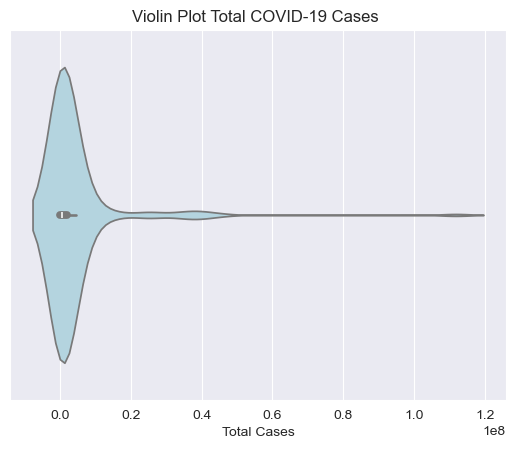

In [38]:
violin, ax = plt.subplots()
sns.violinplot(data = covid19, x = 'TotalCases', ax = ax, color = 'lightblue')
ax.set_title('Violin Plot Total COVID-19 Cases ')
ax.set_xlabel('Total Cases')
plt.savefig('covid cases.png')
plt.show()

In [39]:
covid19['TotalCases'].describe()

count    1.840000e+02
mean     3.736089e+06
std      1.110099e+07
min      2.943000e+03
25%      5.384575e+04
50%      4.632105e+05
75%      1.920548e+06
max      1.118201e+08
Name: TotalCases, dtype: float64

In [40]:
covid19['TotalCases'].median()

463210.5

In [41]:
covid19['TotalCases'].mean()

np.float64(3736089.315217391)

The distribution of total cases is skewed heavily to the right with many outliers. This can be seen graphically as well as numerically by comparing the mean (3,736,089) and median (463,210).

Now let's take a look at total deaths.

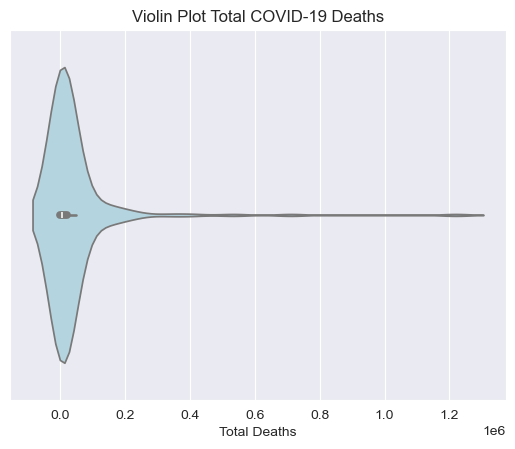

In [42]:
violin, ax = plt.subplots()
sns.violinplot(data = covid19, x = 'TotalDeaths', ax = ax, color = 'lightblue')
ax.set_title('Violin Plot Total COVID-19 Deaths')
ax.set_xlabel('Total Deaths')
plt.savefig('covid deaths.png')
plt.show()

In [43]:
covid19['TotalDeaths'].describe()

count    1.840000e+02
mean     3.794496e+04
std      1.212800e+05
min      1.000000e+00
25%      7.147500e+02
50%      4.509000e+03
75%      2.052275e+04
max      1.219487e+06
Name: TotalDeaths, dtype: float64

In [44]:
covid19['TotalDeaths'].median()

4509.0

Similar to total cases, the distribution of deaths is skewed to the right with many outliers. Average deaths were 37,944 while the median was only 4,509. 

We can also use a scatterplot to analyze the relationship between total cases and deaths. It may be that countries with more cases also have greater death rates simply due to greater exposure to the virus (a postive correlation). However, what if some countries with high case counts have more robust healthcare systems? Then we could expect an inverse correlation. Let's take a look. 

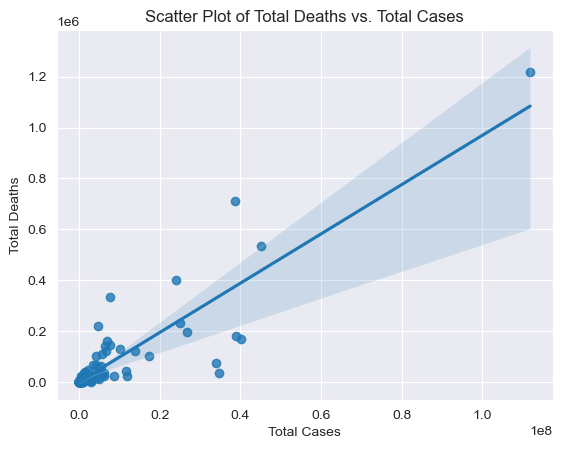

In [45]:
regplot, ax = plt.subplots()
sns.regplot(data = covid19, x = 'TotalCases', y = 'TotalDeaths', ax = ax)
ax.set_title('Scatter Plot of Total Deaths vs. Total Cases')
ax.set_xlabel('Total Cases')
ax.set_ylabel('Total Deaths')
plt.show()

In [46]:
covid19['TotalCases'].corr(covid19['TotalDeaths'])

np.float64(0.8858687854392322)

As we can see from the plot above, there is a strong correlation between total cases and total deaths. This supports the idea that countries with more cases experience more deaths simply due to greater exposure.

### COVID-19 Cases by Region

How did different regions of the world fare during COVID-19?

We can begin investigating this question by using a series of pivot tables.

In [47]:
covid19.groupby(["Continent"])["TotalCases"].median()

Continent
Africa                 63920.5
Asia                 1003450.0
Australia/Oceania      16950.0
Europe               1806093.5
North America         174182.5
South America        1141159.5
Name: TotalCases, dtype: float64

I decided to use the median to get the above pivot table figures since it is more robust against outliers.

As we can see from the above, Europe and South America incurred the most cases on average. Australia and Oceania fared the best with a median case count of 16,950.

We can better visualize these figures using a bar chart.

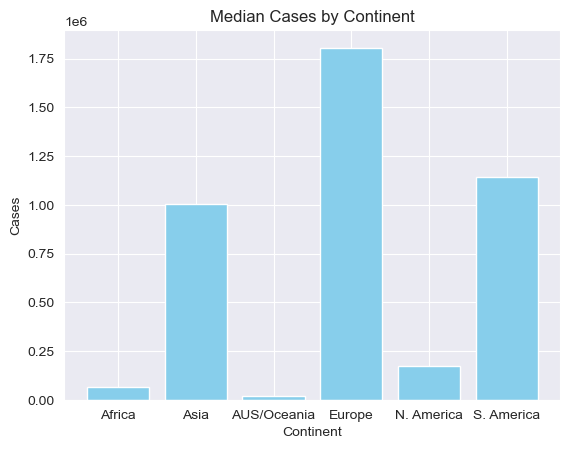

In [48]:
categories_age = ["Africa", "Asia", "AUS/Oceania", "Europe", "N. America", "S. America"]
x = np.arange(len(categories_age))

total_cases = covid19.groupby(["Continent"])["TotalCases"].median().tolist()


plt.bar(x, total_cases, width = 0.8, color = "skyblue")
plt.title("Median Cases by Continent")
plt.xlabel("Continent")
plt.xticks(x, categories_age, rotation = "horizontal")
plt.ylabel("Cases")
plt.savefig('region cases.png')
plt.show()

Let's repeat this process for total deaths.

In [49]:
covid19.groupby(["Continent"])["TotalDeaths"].median()

Continent
Africa                1238.5
Asia                 10400.0
Australia/Oceania       24.0
Europe               17222.5
North America         3993.0
South America        29225.0
Name: TotalDeaths, dtype: float64

Again, Europe and South America fared the worst with median deaths of over 10,000 while Australia/Oceania experienced the least amount of deaths. 

In light of our correlation analysis between total cases and total deaths, the above correspodence between our two pivot tables is unsuprising. 

Let's creat another bar chart for total deaths.

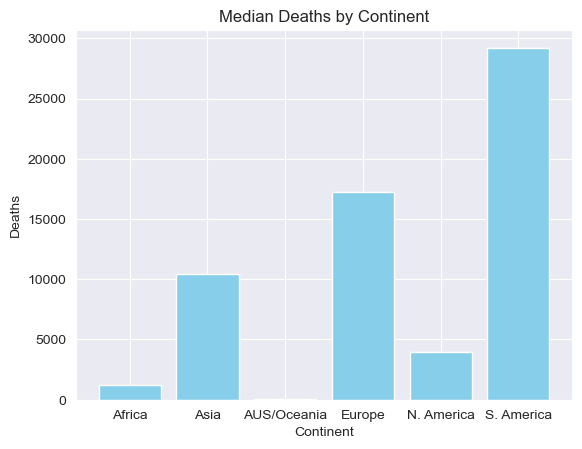

In [50]:
categories_age = ["Africa", "Asia", "AUS/Oceania", "Europe", "N. America", "S. America"]
x = np.arange(len(categories_age))

total_cases = covid19.groupby(["Continent"])["TotalDeaths"].median().tolist()
plt.bar(x, total_cases, width = 0.8, color = "skyblue")
plt.title("Median Deaths by Continent")
plt.xlabel("Continent")
plt.xticks(x, categories_age, rotation = "horizontal")
plt.ylabel("Deaths")
plt.savefig('region deaths.png')
plt.show()

### HDI and COVID-19

Before we look at the relationship between the HDI and Covid-19, let's take a brief look at the descriptive statistics for average HDI ratings.

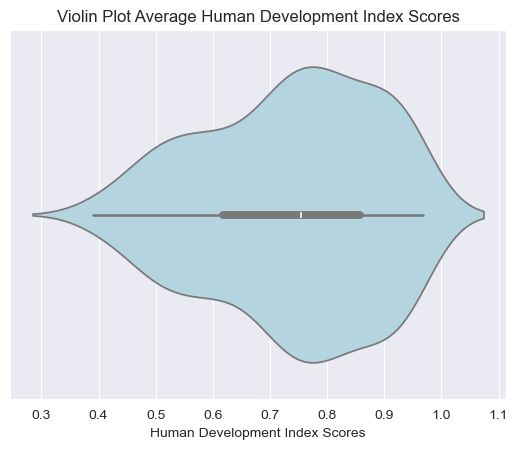

In [51]:
violin, ax = plt.subplots()
sns.violinplot(data = covid19, x = 'Avg HDI', ax = ax, color = 'lightblue')
ax.set_title('Violin Plot Average Human Development Index Scores')
ax.set_xlabel('Human Development Index Scores')
plt.show()

In [52]:
covid19['Avg HDI'].describe()

count    184.000000
mean       0.737771
std        0.149811
min        0.390167
25%        0.617417
50%        0.754833
75%        0.858042
max        0.968000
Name: Avg HDI, dtype: float64

In [53]:
covid19['Avg HDI'].median()

0.7548333333333332

The HDI score can take on values between 0 and 1. From the above violin plot, we can see that the distribution of scores is slightly skewed to the left. The average score is 0.73, representing a good standard of living. Even so, note the long tail on the inner bar in the plot above, an indication that some countries still fall well below a decent standard of living. 

We can also take a look at averageg HDI scores by region.

In [54]:
covid19.groupby(["Continent"])["Avg HDI"].median()

Continent
Africa               0.558167
Asia                 0.755833
Australia/Oceania    0.707333
Europe               0.902833
North America        0.774667
South America        0.768583
Name: Avg HDI, dtype: float64

Europe has the highest standard of living while Africa has the least.

Having taken a brief look at HDI scores, let's analyze these scores in conjunction with our Covid-19 data.

The first thing we can do is see how HDI scores faired during Covid. Since HDI scores take into consideration life expectancy and years of schooling, we may expect to see a drop in scores starting in 2019 and perhaps gradually climbing back thereafter. 

Let's reexamine the distribution of scores from 2018-2023.

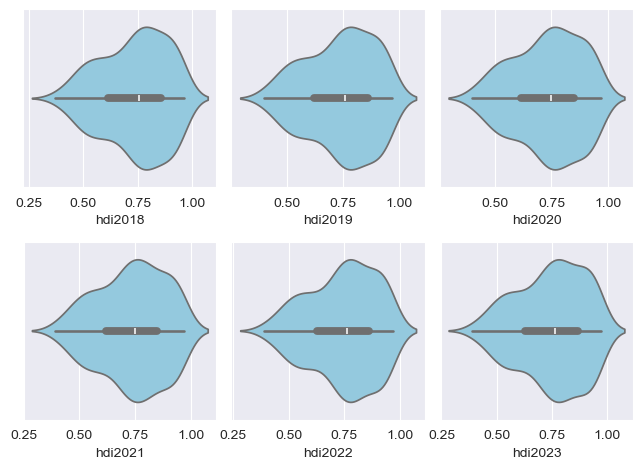

In [55]:
box, ax = plt.subplots(2,3)
sns.violinplot(data = covid19, x = 'hdi2018', ax = ax[0,0], color = 'skyblue')
sns.violinplot(data = covid19, x = 'hdi2019', ax = ax[0,1], color = 'skyblue')
sns.violinplot(data = covid19, x = 'hdi2020', ax = ax[0,2], color = 'skyblue')
sns.violinplot(data = covid19, x = 'hdi2021', ax = ax[1,0], color = 'skyblue')
sns.violinplot(data = covid19, x = 'hdi2022', ax = ax[1,1], color = 'skyblue')
sns.violinplot(data = covid19, x = 'hdi2023', ax = ax[1,2], color = 'skyblue')
plt.tight_layout()
plt.show()

Going by the shape of the violinplots, scores changed little year by year.

In [56]:
covid19['hdi2018'].describe()

count    184.000000
mean       0.734538
std        0.151589
min        0.371000
25%        0.612750
50%        0.759000
75%        0.858000
max        0.966000
Name: hdi2018, dtype: float64

In [57]:
covid19['hdi2019'].describe()

count    184.000000
mean       0.737989
std        0.150553
min        0.400000
25%        0.620250
50%        0.758000
75%        0.861000
max        0.969000
Name: hdi2019, dtype: float64

In [58]:
covid19['hdi2020'].describe()

count    184.000000
mean       0.732924
std        0.148877
min        0.398000
25%        0.616750
50%        0.746500
75%        0.851500
max        0.969000
Name: hdi2020, dtype: float64

In [59]:
covid19['hdi2021'].describe()

count    184.000000
mean       0.733005
std        0.149731
min        0.393000
25%        0.617250
50%        0.747000
75%        0.848250
max        0.969000
Name: hdi2021, dtype: float64

In [60]:
covid19['hdi2022'].describe()

count    184.000000
mean       0.742201
std        0.148954
min        0.388000
25%        0.625750
50%        0.763500
75%        0.860250
max        0.967000
Name: hdi2022, dtype: float64

In [61]:
covid19['hdi2023'].describe()

count    184.000000
mean       0.745967
std        0.149994
min        0.388000
25%        0.628000
50%        0.764500
75%        0.866250
max        0.972000
Name: hdi2023, dtype: float64

The numbers confirm what we were able to spot visually. In fact, scores actually rose slightly after 2021. 

Lastly, let's take a look at the relationship between HDI scores and total cases and total deaths.

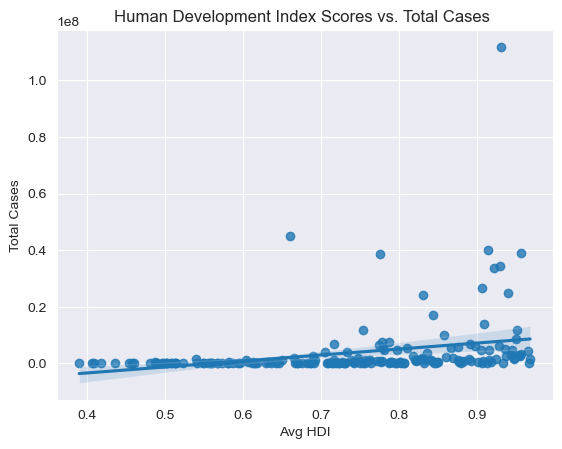

In [62]:
regplot, ax = plt.subplots()
sns.regplot(data = covid19, x = 'Avg HDI', y = 'TotalCases', ax = ax)
ax.set_title('Human Development Index Scores vs. Total Cases ')
ax.set_xlabel('Avg HDI')
ax.set_ylabel('Total Cases')
plt.savefig('hdi.png')
plt.show()

In [63]:
covid19['TotalCases'].corr(covid19['Avg HDI'])

np.float64(0.28540379297560653)

As we can see, there is a week positive correlation between the two variables, indicating that more well developed countries may have actually fared worse in terms of case counts. For all of us who lived through the pandemic, this result is not particularly surprising. Europe got hit particularly hard in spite of its high HDI score. 

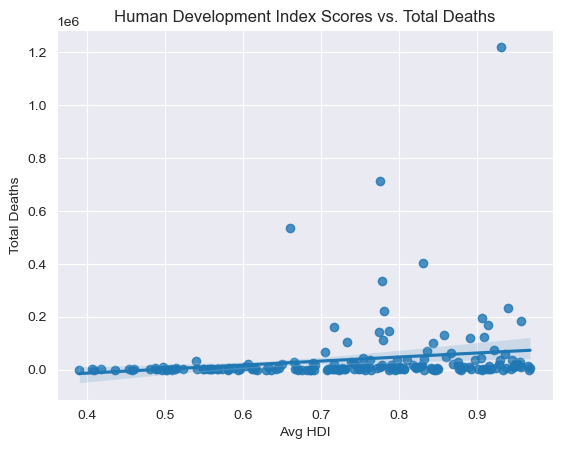

In [64]:
regplot, ax = plt.subplots()
sns.regplot(data = covid19, x = 'Avg HDI', y = 'TotalDeaths', ax = ax)
ax.set_title('Human Development Index Scores vs. Total Deaths')
ax.set_xlabel('Avg HDI')
ax.set_ylabel('Total Deaths')
plt.show()

In [65]:
covid19['TotalDeaths'].corr(covid19['Avg HDI'])

np.float64(0.18811523855415913)

The correlation between total deaths and average HDI scores is even weaker, yet still positive.

The above plots may suggest that how well off a country's citizens are( high incomes, life expectancy and years of schooling) do little to help insulate against a pandemic. 

There are clearly other factors at play. Perhpas population density plays an important role. Or maybe a country's urbanization rate is important. These are interesting questions

### Conclusions

Given the plots above and the generally weak correlation coefficients, there are clearly other factors at play in terms of what determined how countries fared during the pandemic. Perhpas population density plays an important role. Or maybe a country's urbanization rate is important. These are interesting questions worthy of further analysis

## V. Citations

#### Data

Data was retrieved from worldometers.info and ourworldindata.org. The datasets can be found here:

https://ourworldindata.org/grapher/human-development-index?tab=table

https://www.worldometers.info/coronavirus/



#### Other Sources

Deitel, Paul J., and Harvey M. Deitel. Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud. Pearson, 2020.

Lee, Wei-Meng. Python Machine Learning. Wiley, 2019.

Daniel Y. Chen. Pandas For Everyone: Python Data Analysis. Pearson, 2023.